In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import json
import csv
import zipfile
from glob import glob
import os
import shutil
import seaborn as sn
%matplotlib inline

In [87]:
url = 'http://epidemiologia.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip'
r = requests.get(url, allow_redirects=True)
open('BD.zip', 'wb').write(r.content)

22141985

In [88]:
with zipfile.ZipFile('BD.zip', 'r') as zip_ref:
    zip_ref.extractall('datatemp')

In [89]:
filename = glob("datatemp/*.csv")[0]

In [90]:
df = pd.read_csv(filename, encoding = "ISO-8859-1")

In [91]:
shutil.rmtree("datatemp")
os.remove('BD.zip')

In [92]:
df = df.loc[(df['RESULTADO'] == 1)]

In [93]:
df.drop(['FECHA_ACTUALIZACION', 'RESULTADO', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'ENTIDAD_NAC', 'MUNICIPIO_RES', 'TIPO_PACIENTE','OTRO_CASO', 'MIGRANTE','UCI', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INTUBADO', 'OTRA_COM'], axis=1, inplace=True)
df.head()

,ID_REGISTRO,SEXO,ENTIDAD_RES,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
0,1241e1,2,15,2020-06-30,2020-06-22,9999-99-99,2,50,2,2,2,2,2,2,2,2,2
1,12d6d1,1,15,2020-04-24,2020-04-21,9999-99-99,2,52,2,2,2,2,2,2,1,2,2
2,05ab01,2,27,2020-06-16,2020-06-06,9999-99-99,2,16,2,2,2,2,2,2,2,2,2
3,08398c,2,27,2020-06-23,2020-06-14,9999-99-99,2,27,2,2,2,2,2,2,2,2,2
4,174902,2,31,2020-04-17,2020-04-11,2020-04-21,1,56,2,2,2,2,1,2,1,2,2


In [94]:
df_fall = df.set_index("FECHA_DEF")
df_fall = df_fall.drop(["9999-99-99"])
df_fall.count()

ID_REGISTRO       49698
SEXO              49698
ENTIDAD_RES       49698
FECHA_INGRESO     49698
FECHA_SINTOMAS    49698
NEUMONIA          49698
EDAD              49698
DIABETES          49698
EPOC              49698
ASMA              49698
INMUSUPR          49698
HIPERTENSION      49698
CARDIOVASCULAR    49698
OBESIDAD          49698
RENAL_CRONICA     49698
TABAQUISMO        49698
dtype: int64

In [95]:
df_fall = df_fall.reset_index()

In [96]:
df_fall["Sintomas a hospitalizacion"] = ""
df_fall["Sintomas a Defuncion"] = ""
df_fall["Hospitalizacion a Defuncion"] =""
df_fall.head()

,FECHA_DEF,ID_REGISTRO,SEXO,ENTIDAD_RES,FECHA_INGRESO,FECHA_SINTOMAS,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,Sintomas a hospitalizacion,Sintomas a Defuncion,Hospitalizacion a Defuncion
0,2020-04-21,174902,2,31,2020-04-17,2020-04-11,1,56,2,2,2,2,1,2,1,2,2,,,
1,2020-05-05,00c2d6,1,9,2020-04-14,2020-04-10,1,15,2,2,2,2,2,2,1,2,2,,,
2,2020-04-19,13e374,1,2,2020-04-18,2020-04-12,1,50,1,2,2,2,1,2,1,2,2,,,
3,2020-04-05,0ea851,1,15,2020-04-05,2020-04-05,1,70,2,2,2,2,2,2,2,2,2,,,
4,2020-05-14,0aa887,1,9,2020-05-09,2020-04-28,2,78,1,2,2,2,2,2,2,2,2,,,


In [97]:
df_fall['FECHA_DEF'] = pd.to_datetime(df_fall['FECHA_DEF'])
df_fall['FECHA_INGRESO'] = pd.to_datetime(df_fall['FECHA_INGRESO'])
df_fall['FECHA_SINTOMAS'] = pd.to_datetime(df_fall['FECHA_SINTOMAS'])
df_fall["Sintomas a Defuncion"] = pd.to_datetime(df_fall["Sintomas a Defuncion"])
df_fall["Sintomas a hospitalizacion"] = pd.to_datetime(df_fall["Sintomas a hospitalizacion"])
df_fall["Hospitalizacion a Defuncion"] = pd.to_datetime(df_fall["Hospitalizacion a Defuncion"])
df_fall.dtypes

FECHA_DEF                      datetime64[ns]
ID_REGISTRO                            object
SEXO                                    int64
ENTIDAD_RES                             int64
FECHA_INGRESO                  datetime64[ns]
FECHA_SINTOMAS                 datetime64[ns]
NEUMONIA                                int64
EDAD                                    int64
DIABETES                                int64
EPOC                                    int64
ASMA                                    int64
INMUSUPR                                int64
HIPERTENSION                            int64
CARDIOVASCULAR                          int64
OBESIDAD                                int64
RENAL_CRONICA                           int64
TABAQUISMO                              int64
Sintomas a hospitalizacion     datetime64[ns]
Sintomas a Defuncion           datetime64[ns]
Hospitalizacion a Defuncion    datetime64[ns]
dtype: object

In [98]:
df_fall["Sintomas a hospitalizacion"] = (df_fall['FECHA_INGRESO'] - df_fall['FECHA_SINTOMAS']).dt.days
df_fall["Sintomas a Defuncion"] = (df_fall['FECHA_DEF'] - df_fall['FECHA_SINTOMAS']).dt.days
df_fall["Hospitalizacion a Defuncion"] = (df_fall['FECHA_DEF'] - df_fall['FECHA_INGRESO']).dt.days

df_fall.head()

,FECHA_DEF,ID_REGISTRO,SEXO,ENTIDAD_RES,FECHA_INGRESO,FECHA_SINTOMAS,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,Sintomas a hospitalizacion,Sintomas a Defuncion,Hospitalizacion a Defuncion
0,2020-04-21,174902,2,31,2020-04-17,2020-04-11,1,56,2,2,2,2,1,2,1,2,2,6,10,4
1,2020-05-05,00c2d6,1,9,2020-04-14,2020-04-10,1,15,2,2,2,2,2,2,1,2,2,4,25,21
2,2020-04-19,13e374,1,2,2020-04-18,2020-04-12,1,50,1,2,2,2,1,2,1,2,2,6,7,1
3,2020-04-05,0ea851,1,15,2020-04-05,2020-04-05,1,70,2,2,2,2,2,2,2,2,2,0,0,0
4,2020-05-14,0aa887,1,9,2020-05-09,2020-04-28,2,78,1,2,2,2,2,2,2,2,2,11,16,5


In [99]:
df_fall["SEXO"].replace({2: "Hombre", 1: "Mujer"}, inplace=True)

In [100]:
df_fall["ENTIDAD_RES"].replace({1 : "AGUASCALIENTES",
2 : "BAJA CALIFORNIA",
3 : "BAJA CALIFORNIA SUR",
4 : "CAMPECHE",
5 : "COAHUILA DE ZARAGOZA",
6 : "COLIMA",
7 : "CHIAPAS",
8 : "CHIHUAHUA",
9 : "CIUDAD DE MÉXICO",
10 : "DURANGO",
11 : "GUANAJUATO",
12 : "GUERRERO",
13 : "HIDALGO",
14 : "JALISCO",
15 : "MEXICO",
16 : "MICHOACAN DE OCAMPO",
17 : "MORELOS",
18 : "NAYARIT",
19 : "NUEVO LEON",
20 : "OAXACA",
21 : "PUEBLA",
22 : "QUERETARO",
23 : "QUINTANA ROO",
24 : "SAN LUIS POTOSI",
25 : "SINALOA",
26 : "SONORA",
27 : "TABASCO",
28 : "TAMAULIPAS",
29 : "TLAXCALA",
30 : "VERACRUZ DE IGNACIO DE LA LLAVE",
31 : "YUCATAN",
32 : "ZACATECAS",
88 : "NO APLICA",
99 : "SE IGNORA"}, inplace=True)

In [101]:
df_fall["NEUMONIA"].replace({2: "NO", 1: "SI", 97 : "NO APLICA", 98 : "SE IGNORA", 99 : "NO ESPECIFICADO"}, inplace=True)
df_fall["DIABETES"].replace({2: "NO", 1: "SI", 97 : "NO APLICA", 98 : "SE IGNORA", 99 : "NO ESPECIFICADO"}, inplace=True)
df_fall["ASMA"].replace({2: "NO", 1: "SI", 97 : "NO APLICA", 98 : "SE IGNORA", 99 : "NO ESPECIFICADO"}, inplace=True)
df_fall["EPOC"].replace({2: "NO", 1: "SI", 97 : "NO APLICA", 98 : "SE IGNORA", 99 : "NO ESPECIFICADO"}, inplace=True)
df_fall["INMUSUPR"].replace({2: "NO", 1: "SI", 97 : "NO APLICA", 98 : "SE IGNORA", 99 : "NO ESPECIFICADO"}, inplace=True)
df_fall["HIPERTENSION"].replace({2: "NO", 1: "SI", 97 : "NO APLICA", 98 : "SE IGNORA", 99 : "NO ESPECIFICADO"}, inplace=True)
df_fall["CARDIOVASCULAR"].replace({2: "NO", 1: "SI", 97 : "NO APLICA", 98 : "SE IGNORA", 99 : "NO ESPECIFICADO"}, inplace=True)
df_fall["OBESIDAD"].replace({2: "NO", 1: "SI", 97 : "NO APLICA", 98 : "SE IGNORA", 99 : "NO ESPECIFICADO"}, inplace=True)
df_fall["RENAL_CRONICA"].replace({2: "NO", 1: "SI", 97 : "NO APLICA", 98 : "SE IGNORA", 99 : "NO ESPECIFICADO"}, inplace=True)
df_fall["TABAQUISMO"].replace({2: "NO", 1: "SI", 97 : "NO APLICA", 98 : "SE IGNORA", 99 : "NO ESPECIFICADO"}, inplace=True)

In [102]:
df_fall.head()

,FECHA_DEF,ID_REGISTRO,SEXO,ENTIDAD_RES,FECHA_INGRESO,FECHA_SINTOMAS,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,Sintomas a hospitalizacion,Sintomas a Defuncion,Hospitalizacion a Defuncion
0,2020-04-21,174902,Hombre,YUCATAN,2020-04-17,2020-04-11,SI,56,NO,NO,NO,NO,SI,NO,SI,NO,NO,6,10,4
1,2020-05-05,00c2d6,Mujer,CIUDAD DE MÉXICO,2020-04-14,2020-04-10,SI,15,NO,NO,NO,NO,NO,NO,SI,NO,NO,4,25,21
2,2020-04-19,13e374,Mujer,BAJA CALIFORNIA,2020-04-18,2020-04-12,SI,50,SI,NO,NO,NO,SI,NO,SI,NO,NO,6,7,1
3,2020-04-05,0ea851,Mujer,MEXICO,2020-04-05,2020-04-05,SI,70,NO,NO,NO,NO,NO,NO,NO,NO,NO,0,0,0
4,2020-05-14,0aa887,Mujer,CIUDAD DE MÉXICO,2020-05-09,2020-04-28,NO,78,SI,NO,NO,NO,NO,NO,NO,NO,NO,11,16,5


In [103]:
#data = "final_luis.csv"
#data_df = pd.read_csv(data)
df_fall.count()

FECHA_DEF                      49698
ID_REGISTRO                    49698
SEXO                           49698
ENTIDAD_RES                    49698
FECHA_INGRESO                  49698
FECHA_SINTOMAS                 49698
NEUMONIA                       49698
EDAD                           49698
DIABETES                       49698
EPOC                           49698
ASMA                           49698
INMUSUPR                       49698
HIPERTENSION                   49698
CARDIOVASCULAR                 49698
OBESIDAD                       49698
RENAL_CRONICA                  49698
TABAQUISMO                     49698
Sintomas a hospitalizacion     49698
Sintomas a Defuncion           49698
Hospitalizacion a Defuncion    49698
dtype: int64

In [104]:
df_fall.drop(["FECHA_DEF", "FECHA_INGRESO", "FECHA_SINTOMAS"], axis=1, inplace=True)
df_fall

,ID_REGISTRO,SEXO,ENTIDAD_RES,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,Sintomas a hospitalizacion,Sintomas a Defuncion,Hospitalizacion a Defuncion
0,174902,Hombre,YUCATAN,SI,56,NO,NO,NO,NO,SI,NO,SI,NO,NO,6,10,4
1,00c2d6,Mujer,CIUDAD DE MÉXICO,SI,15,NO,NO,NO,NO,NO,NO,SI,NO,NO,4,25,21
2,13e374,Mujer,BAJA CALIFORNIA,SI,50,SI,NO,NO,NO,SI,NO,SI,NO,NO,6,7,1
3,0ea851,Mujer,MEXICO,SI,70,NO,NO,NO,NO,NO,NO,NO,NO,NO,0,0,0
4,0aa887,Mujer,CIUDAD DE MÉXICO,NO,78,SI,NO,NO,NO,NO,NO,NO,NO,NO,11,16,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49693,0fdd3c,Hombre,SAN LUIS POTOSI,SI,35,NO,NO,NO,NO,NO,NO,NO,NO,SI,0,17,17
49694,141dac,Mujer,JALISCO,SI,39,NO,NO,NO,NO,NO,NO,NO,NO,NO,7,14,7
49695,14b471,Mujer,VERACRUZ DE IGNACIO DE LA LLAVE,SI,63,NO,NO,NO,NO,NO,NO,NO,NO,NO,2,7,5
49696,09e1ee,Mujer,TABASCO,SI,85,NO,NO,NO,NO,SI,SI,NO,NO,NO,5,9,4


In [105]:
df_fall.describe()

,EDAD,Sintomas a hospitalizacion,Sintomas a Defuncion,Hospitalizacion a Defuncion
count,49698.000000,49698.000000,49698.000000,49698.000000
mean,61.742847,4.434444,12.178558,7.744114
std,14.217348,3.524340,8.057944,7.567800
min,0.000000,0.000000,0.000000,-57.000000
25%,53.000000,2.000000,7.000000,2.000000
50%,62.000000,4.000000,11.000000,6.000000
75%,72.000000,7.000000,16.000000,11.000000
max,103.000000,68.000000,106.000000,106.000000


In [106]:
df_fall.dtypes

ID_REGISTRO                    object
SEXO                           object
ENTIDAD_RES                    object
NEUMONIA                       object
EDAD                            int64
DIABETES                       object
EPOC                           object
ASMA                           object
INMUSUPR                       object
HIPERTENSION                   object
CARDIOVASCULAR                 object
OBESIDAD                       object
RENAL_CRONICA                  object
TABAQUISMO                     object
Sintomas a hospitalizacion      int64
Sintomas a Defuncion            int64
Hospitalizacion a Defuncion     int64
dtype: object

In [107]:
Q1 = df_fall.quantile(0.25)
Q3 = df_fall.quantile(0.75)
IQR_final = Q3 - Q1
IQR_final

EDAD                           19.0
Sintomas a hospitalizacion      5.0
Sintomas a Defuncion            9.0
Hospitalizacion a Defuncion     9.0
dtype: float64

In [108]:
df_listo = df_fall[(data_df["Sintomas a Defuncion"] >=0) & (df_fall["Hospitalizacion a Defuncion"]>=0) & (df_fall["EDAD"] <=90)]
df_listo.describe()

,EDAD,Sintomas a hospitalizacion,Sintomas a Defuncion,Hospitalizacion a Defuncion
count,49121.000000,49121.000000,49121.000000,49121.000000
mean,61.427658,4.436147,12.212211,7.776063
std,13.916902,3.509996,8.053594,7.550644
min,0.000000,0.000000,0.000000,0.000000
25%,52.000000,2.000000,7.000000,2.000000
50%,62.000000,4.000000,11.000000,6.000000
75%,71.000000,7.000000,16.000000,11.000000
max,90.000000,68.000000,106.000000,106.000000


In [111]:
data_df = df_listo[~((df_listo < (Q1 - 1.5 * IQR_final)) | (df_listo > (Q3 + 1.5 * IQR_final))).any(axis=1)]
data_df.describe()

,EDAD,Sintomas a hospitalizacion,Sintomas a Defuncion,Hospitalizacion a Defuncion
count,46364.000000,46364.000000,46364.000000,46364.000000
mean,61.859740,4.344319,11.116621,6.772302
std,13.334847,3.326185,6.108281,5.549489
min,25.000000,0.000000,0.000000,0.000000
25%,53.000000,2.000000,6.000000,2.000000
50%,62.000000,4.000000,10.000000,5.000000
75%,72.000000,7.000000,15.000000,10.000000
max,90.000000,14.000000,29.000000,24.000000


In [114]:
bins =[0, 15, 30, 45, 60, 100]
group_names = ["Menos de 15", "16 a 30", "31 a 45", "46 a 60", "mayores de 60"]
data_df= df_out
df_out["Grupo de Edad"] = pd.cut(df_out["EDAD"], bins, labels=group_names, include_lowest=True)
df_out.head()

C:\Users\willo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ID_REGISTRO,SEXO,ENTIDAD_RES,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,Sintomas a hospitalizacion,Sintomas a Defuncion,Hospitalizacion a Defuncion,Grupo de Edad
0,174902,Hombre,YUCATAN,SI,56,NO,NO,NO,NO,SI,NO,SI,NO,NO,6,10,4,46 a 60
2,13e374,Mujer,BAJA CALIFORNIA,SI,50,SI,NO,NO,NO,SI,NO,SI,NO,NO,6,7,1,46 a 60
3,0ea851,Mujer,MEXICO,SI,70,NO,NO,NO,NO,NO,NO,NO,NO,NO,0,0,0,mayores de 60
4,0aa887,Mujer,CIUDAD DE MÉXICO,NO,78,SI,NO,NO,NO,NO,NO,NO,NO,NO,11,16,5,mayores de 60
5,0e05f1,Mujer,SINALOA,SI,74,NO,NO,NO,NO,SI,NO,NO,NO,NO,9,24,15,mayores de 60


The correlation between the patient's  Sex and the time from sympthom detection till demise is:
Hombre    0.031429
Mujer    -0.031429
dtype: float64


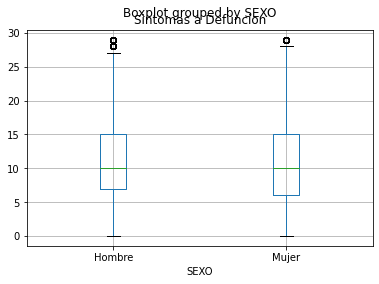

In [115]:
df_out.boxplot(column="Sintomas a Defuncion", by="SEXO")
s_corr_s = df_out["SEXO"].str.get_dummies().corrwith(df_out["Sintomas a Defuncion"])
print("The correlation between the patient's  Sex and the time from sympthom detection till demise is:")
print(s_corr_s)

The correlation between the patient's  Sex and the time from hospitalization till demise is:
Hombre    0.013096
Mujer    -0.013096
dtype: float64


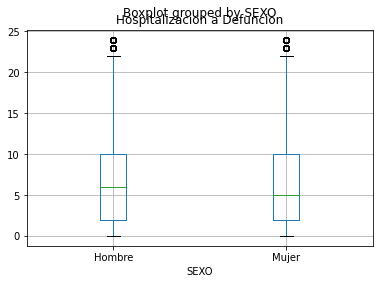

In [116]:
df_out.boxplot(column="Hospitalizacion a Defuncion", by="SEXO")
s_corr_sh = df_out["SEXO"].str.get_dummies().corrwith(df_out["Hospitalizacion a Defuncion"])
print("The correlation between the patient's  Sex and the time from hospitalization till demise is:")
print(s_corr_sh)

The correlation between the patient's  Age Group and the time from hospitalization till demise is:
16 a 30         -0.009423
31 a 45         -0.001215
46 a 60          0.023571
mayores de 60   -0.019452
dtype: float64


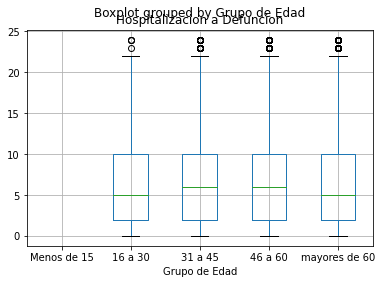

In [117]:
df_out.boxplot(column="Hospitalizacion a Defuncion", by="Grupo de Edad")
s_corr_gh = df_out["Grupo de Edad"].str.get_dummies().corrwith(df_out["Hospitalizacion a Defuncion"])
print("The correlation between the patient's  Age Group and the time from hospitalization till demise is:")
print(s_corr_gh)

The correlation between the patient's  Sex and the time from sympthom detection till demise is:
16 a 30         -0.012589
31 a 45          0.000354
46 a 60          0.032448
mayores de 60   -0.028125
dtype: float64


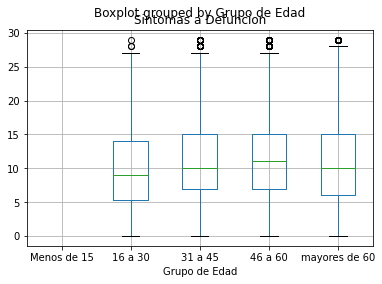

In [118]:
df_out.boxplot(column="Sintomas a Defuncion", by="Grupo de Edad")
s_corr_g = df_out["Grupo de Edad"].str.get_dummies().corrwith(df_out["Sintomas a Defuncion"])
print("The correlation between the patient's  Sex and the time from sympthom detection till demise is:")
print(s_corr_g)

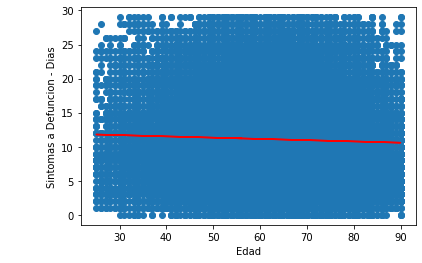

The correlation between the patient's Age and the time from sympthom detection till demise is -0.04


In [119]:
x_values = df_out["EDAD"]
y_values = df_out["Sintomas a Defuncion"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Edad")
plt.ylabel("Sintomas a Defuncion - Dias")
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between the patient's Age and the time from sympthom detection till demise is {round(correlation[0],2)}")

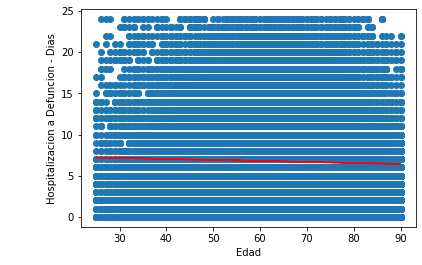

The correlation between the patient's Age and the time from hospitalization till demise is -0.03


In [141]:
x_valuesa = df_out["EDAD"]
y_valuesa = df_out["Hospitalizacion a Defuncion"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_valuesa, y_valuesa)
regress_valuesa = x_values * slope + intercept
line_eqa = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_valuesa,y_valuesa)
plt.plot(x_valuesa,regress_valuesa,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Edad")
plt.ylabel("Hospitalizacion a Defuncion - Dias")
plt.show()
correlation_hd = st.pearsonr(x_valuesa,y_valuesa)
print(f"The correlation between the patient's Age and the time from hospitalization till demise is {round(correlation_hd[0],2)}")

The correlation between the patient's sympthom detection and it's tobacco usage is:
NO          -0.008151
SE IGNORA   -0.016140
SI           0.013002
dtype: float64


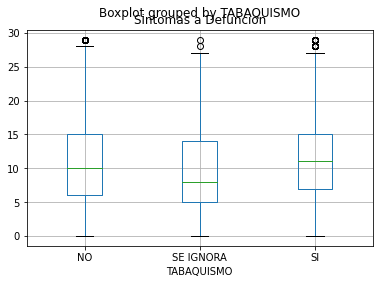

In [121]:
df_out.boxplot(column="Sintomas a Defuncion", by="TABAQUISMO")
s_corr_t = df_out["TABAQUISMO"].str.get_dummies().corrwith(df_out["Sintomas a Defuncion"])
print("The correlation between the patient's sympthom detection and it's tobacco usage is:")
print(s_corr_t)

The correlation between the patient's hospitalization until demise and it's tobacco usage is:
NO          -0.002907
SE IGNORA   -0.015574
SI           0.007424
dtype: float64


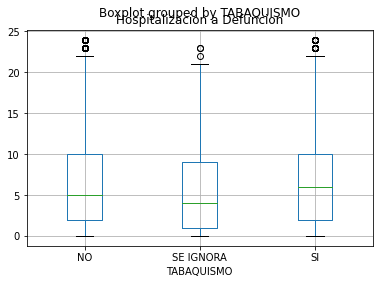

In [122]:
df_out.boxplot(column="Hospitalizacion a Defuncion", by="TABAQUISMO")
s_corr_th = df_out["TABAQUISMO"].str.get_dummies().corrwith(df_out["Hospitalizacion a Defuncion"])
print("The correlation between the patient's hospitalization until demise and it's tobacco usage is:")
print(s_corr_th)

The correlation between the patient's sympthom detection until demise and Diabetes is:
NO           0.065779
SE IGNORA   -0.018351
SI          -0.063067
dtype: float64


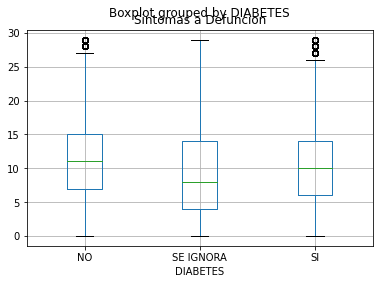

In [123]:
df_out.boxplot(column="Sintomas a Defuncion", by="DIABETES")
s_corr_d = df_out["DIABETES"].str.get_dummies().corrwith(df_out["Sintomas a Defuncion"])
print("The correlation between the patient's sympthom detection until demise and Diabetes is:")
print(s_corr_d)


The correlation between the patient's hospitalization until demise and Diabetes is:
NO           0.066067
SE IGNORA   -0.017381
SI          -0.063509
dtype: float64


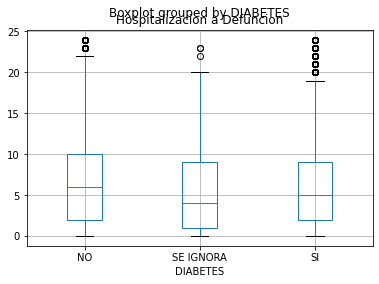

In [124]:
df_out.boxplot(column="Hospitalizacion a Defuncion", by="DIABETES")
s_corr_dh = df_out["DIABETES"].str.get_dummies().corrwith(df_out["Hospitalizacion a Defuncion"])
print("The correlation between the patient's hospitalization until demise and Diabetes is:")
print(s_corr_dh)

The correlation between the patient's sympthom detection until demise and Asthma is:
NO           0.004441
SE IGNORA   -0.017672
SI           0.004309
dtype: float64


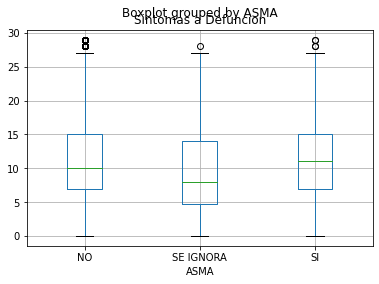

In [125]:
df_out.boxplot(column="Sintomas a Defuncion", by="ASMA")
s_corr_a = df_out["ASMA"].str.get_dummies().corrwith(df_out["Sintomas a Defuncion"])
print("The correlation between the patient's sympthom detection until demise and Asthma is:")
print(s_corr_a)

The correlation between the patient's Hospitalization until demise and Asthma is:
NO           0.004820
SE IGNORA   -0.016821
SI           0.003435
dtype: float64


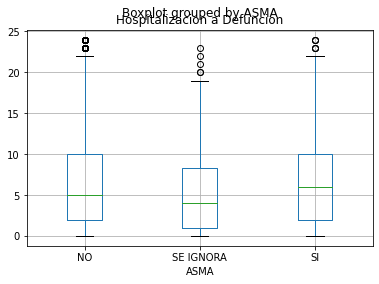

In [126]:
df_out.boxplot(column="Hospitalizacion a Defuncion", by="ASMA")
s_corr_ah = df_out["ASMA"].str.get_dummies().corrwith(df_out["Hospitalizacion a Defuncion"])
print("The correlation between the patient's Hospitalization until demise and Asthma is:")
print(s_corr_ah)

The correlation between the patient's sympthom detection until demise and Obesity is:
NO           0.007924
SE IGNORA   -0.016231
SI          -0.005076
dtype: float64


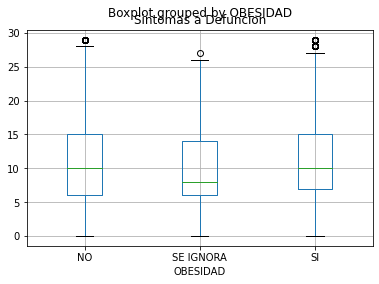

In [127]:
df_out.boxplot(column="Sintomas a Defuncion", by="OBESIDAD")
s_corr_o = df_out["OBESIDAD"].str.get_dummies().corrwith(df_out["Sintomas a Defuncion"])
print("The correlation between the patient's sympthom detection until demise and Obesity is:")
print(s_corr_o)

The correlation between the patient's Hospitalization until demise and Obesity is:
NO           0.038360
SE IGNORA   -0.020382
SI          -0.035010
dtype: float64


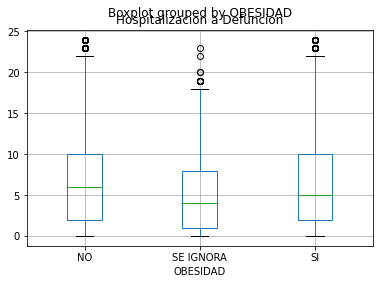

In [128]:
df_out.boxplot(column="Hospitalizacion a Defuncion", by="OBESIDAD")
s_corr_oh = df_out["OBESIDAD"].str.get_dummies().corrwith(df_out["Hospitalizacion a Defuncion"])
print("The correlation between the patient's Hospitalization until demise and Obesity is:")
print(s_corr_oh)

The correlation between the patient's sympthom detection until demise and State of residency is:
AGUASCALIENTES                    -0.007068
BAJA CALIFORNIA                    0.031151
BAJA CALIFORNIA SUR               -0.001654
CAMPECHE                           0.010961
CHIAPAS                            0.004246
CHIHUAHUA                         -0.010514
CIUDAD DE MÉXICO                   0.057223
COAHUILA DE ZARAGOZA              -0.055868
COLIMA                             0.004497
DURANGO                           -0.013042
GUANAJUATO                        -0.021990
GUERRERO                          -0.016783
HIDALGO                           -0.004010
JALISCO                            0.000569
MEXICO                            -0.018255
MICHOACAN DE OCAMPO               -0.001767
MORELOS                           -0.044030
NAYARIT                           -0.024695
NUEVO LEON                        -0.002966
OAXACA                            -0.029358
PUEBLA                 

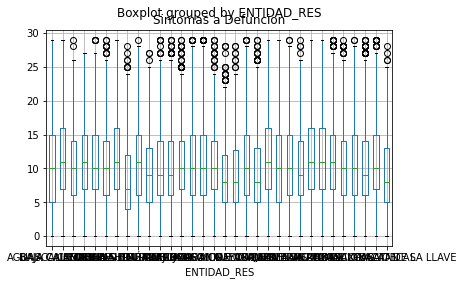

In [129]:
df_out.boxplot(column="Sintomas a Defuncion", by="ENTIDAD_RES")
s_corr_e = df_out["ENTIDAD_RES"].str.get_dummies().corrwith(df_out["Sintomas a Defuncion"])
print("The correlation between the patient's sympthom detection until demise and State of residency is:")
print(s_corr_e)

The correlation between the patient's hospitalization until demise and State of residency is:
AGUASCALIENTES                     0.009362
BAJA CALIFORNIA                    0.032127
BAJA CALIFORNIA SUR                0.010194
CAMPECHE                          -0.007450
CHIAPAS                            0.005086
CHIHUAHUA                          0.002315
CIUDAD DE MÉXICO                   0.056013
COAHUILA DE ZARAGOZA              -0.021281
COLIMA                             0.008440
DURANGO                           -0.001837
GUANAJUATO                        -0.014850
GUERRERO                          -0.029736
HIDALGO                           -0.012902
JALISCO                            0.012034
MEXICO                             0.013341
MICHOACAN DE OCAMPO               -0.007995
MORELOS                           -0.027446
NAYARIT                           -0.016271
NUEVO LEON                         0.014573
OAXACA                            -0.023247
PUEBLA                    

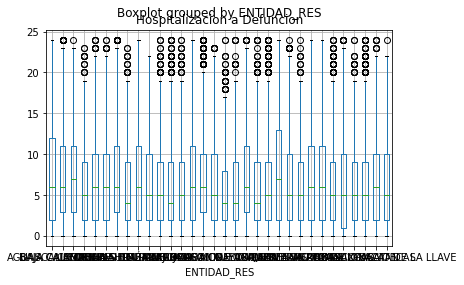

In [130]:
df_out.boxplot(column="Hospitalizacion a Defuncion", by="ENTIDAD_RES")
s_corr_eh = df_out["ENTIDAD_RES"].str.get_dummies().corrwith(df_out["Hospitalizacion a Defuncion"])
print("The correlation between the patient's hospitalization until demise and State of residency is:")
print(s_corr_eh)

The correlation between the patient's  Inmunosupressed disease and the time from sympthom detection till demise is:
NO           0.022445
SE IGNORA   -0.018424
SI          -0.015890
dtype: float64


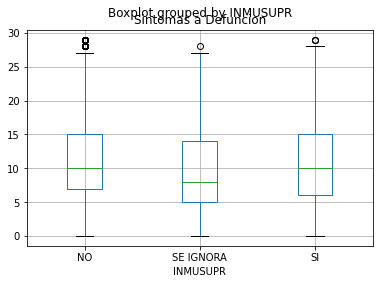

In [131]:
df_out.boxplot(column="Sintomas a Defuncion", by="INMUSUPR")
s_corr_u = df_out["INMUSUPR"].str.get_dummies().corrwith(df_out["Sintomas a Defuncion"])
print("The correlation between the patient's  Inmunosupressed disease and the time from sympthom detection till demise is:")
print(s_corr_u)

The correlation between the patient's  Inmunosupressed disease and the time from hospitalization till demise is:
NO           0.012682
SE IGNORA   -0.016959
SI          -0.005807
dtype: float64


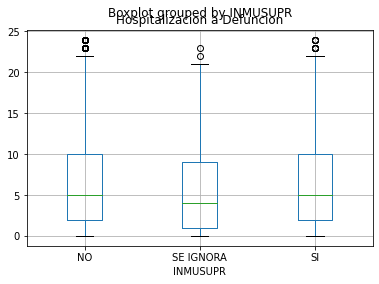

In [132]:
df_out.boxplot(column="Hospitalizacion a Defuncion", by="INMUSUPR")
s_corr_uh = df_out["INMUSUPR"].str.get_dummies().corrwith(df_out["Hospitalizacion a Defuncion"])
print("The correlation between the patient's  Inmunosupressed disease and the time from hospitalization till demise is:")
print(s_corr_uh)

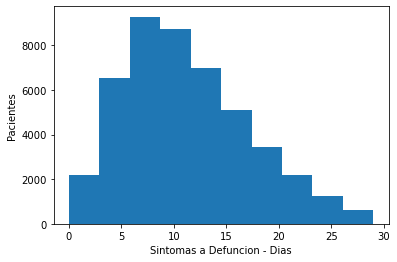

In [133]:
#avg_s2d = df_out["Sintomas a Defuncion"]
#avg_h2d = df_out["Hospitalizacion a Defuncion"]
#keys = df_out["Grupo de Edad"].keys()
#sint_avg = plt.plot(keys, avg_s2d, color="blue", label="Sintomas a Defuncion")
#hosp_avg = plt.plot(keys, avg_h2d, color="green", label="Hospitalizacion a Defuncion")
plt.hist(df_out["Sintomas a Defuncion"])
plt.xlabel("Sintomas a Defuncion - Dias")
plt.ylabel("Pacientes")
plt.show()

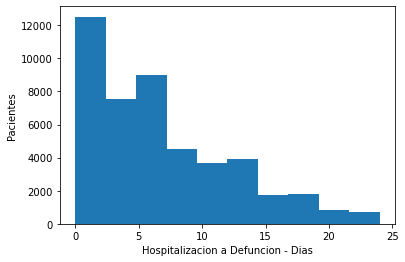

In [134]:
plt.hist(df_out["Hospitalizacion a Defuncion"])
plt.xlabel("Hospitalizacion a Defuncion - Dias")
plt.ylabel("Pacientes")
plt.show()

In [59]:
sem_sad = st.sem(df_out["Hospitalizacion a Defuncion"])
sem_sad

0.023748409740822256

In [140]:
sem_sads = st.sem(df_out["Sintomas a Defuncion"])
sem_sads

0.028367990037543343

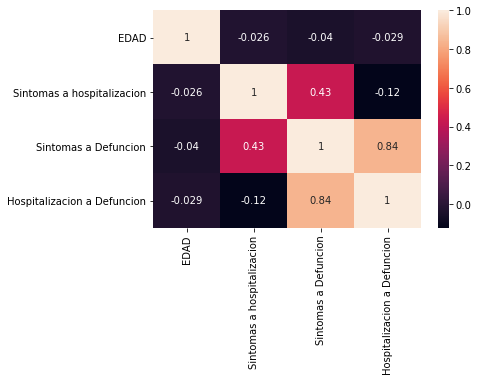

In [137]:
corrMatrix = df_out.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()